In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
num=pd.read_csv('healthcare-dataset-stroke-data.csv',encoding='latin1')
num

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
num.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
num.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
num.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


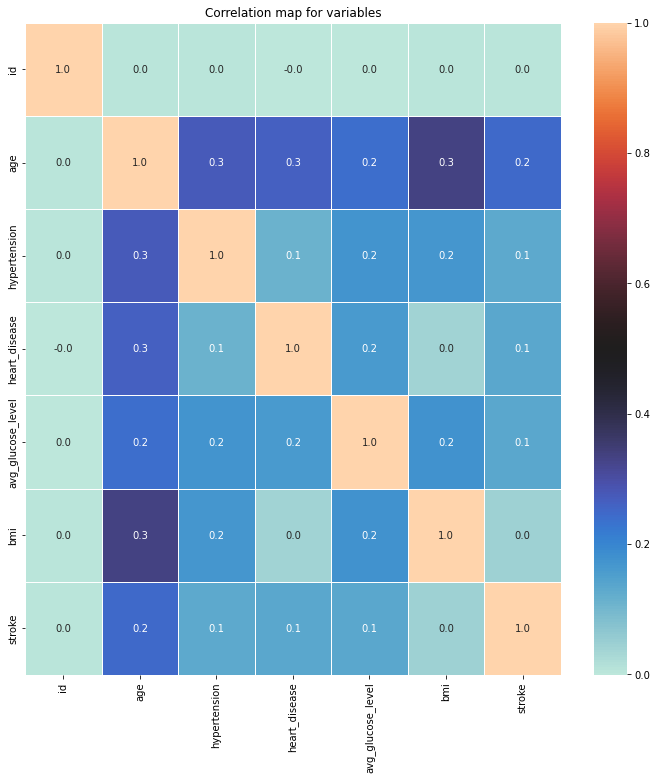

In [7]:
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire")
plt.show()

In [8]:
num.drop("id",inplace=True,axis=1)

In [9]:
num.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
num.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
num.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
num=num.fillna(num['bmi'].mean())

In [13]:
num.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
num.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
num['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

# Data visualization

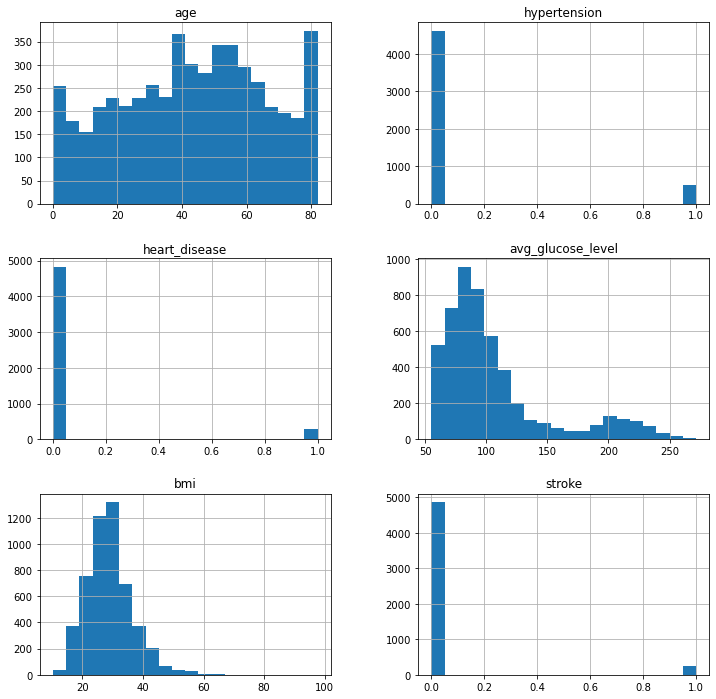

In [16]:
num.hist(figsize=(12,12), bins=20)
plt.show()

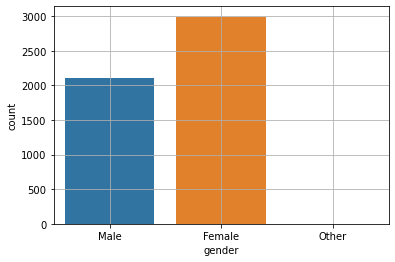

In [17]:
sns.countplot(data=num, x = 'gender')
plt.grid()
plt.show()

In [18]:
num.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

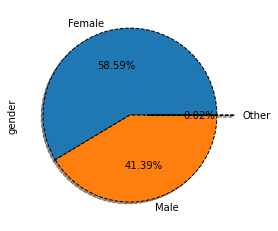

In [19]:
ax1=num['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.2],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

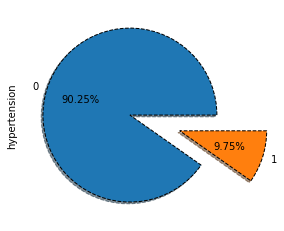

In [20]:
num['hypertension'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.6],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

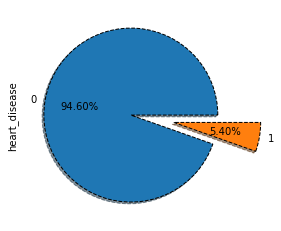

In [21]:
num['heart_disease'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.5],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

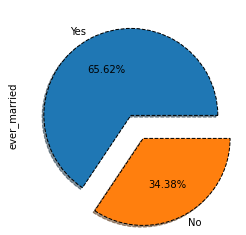

In [22]:
num['ever_married'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.3],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

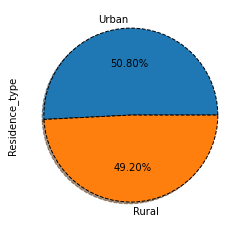

In [23]:
num['Residence_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

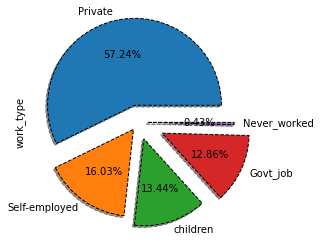

In [24]:
num['work_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0.2,0.1,0.2,0.3,0.1],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

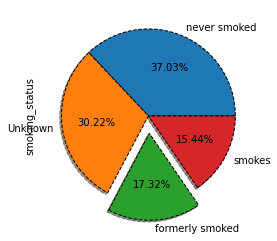

In [25]:
num['smoking_status'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.2,0],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

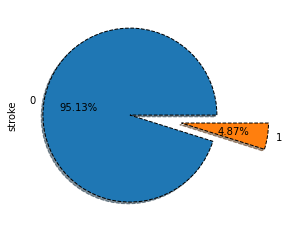

In [26]:
num['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.6],
                                        wedgeprops={'edgecolor':'k','ls':'--'},shadow=True)
plt.grid()
plt.show()

# Data preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [28]:
ss=StandardScaler()
LE=LabelEncoder()

In [29]:
num['gender'] = LE.fit_transform(num['gender'])

In [30]:
num['ever_married']=LE.fit_transform(num['ever_married'])

In [31]:
num['work_type']=LE.fit_transform(num['work_type'])

In [32]:
num['Residence_type']=LE.fit_transform(num['Residence_type'])

In [33]:
num['smoking_status']=LE.fit_transform(num['smoking_status'])

In [34]:
num.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [35]:
num.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

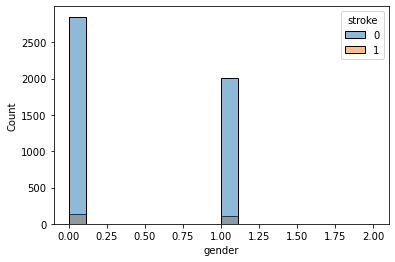

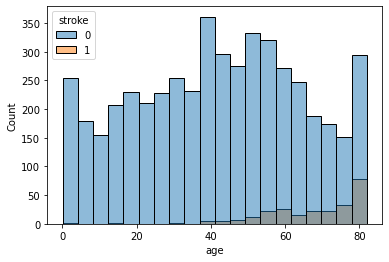

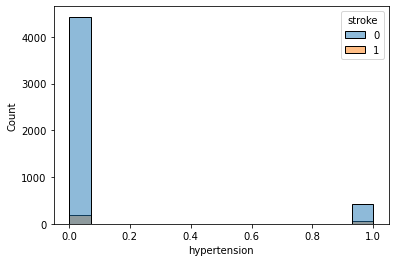

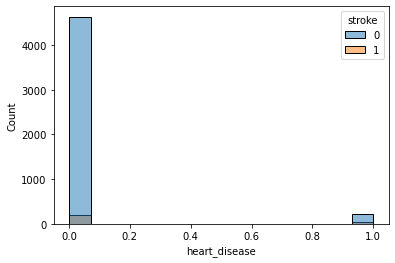

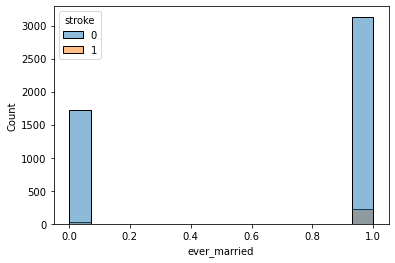

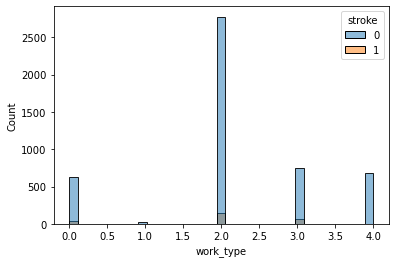

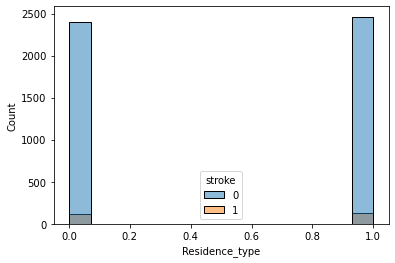

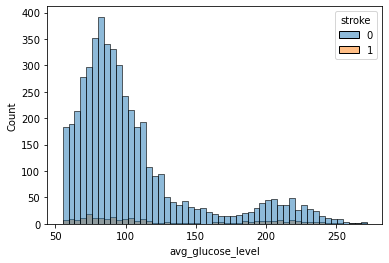

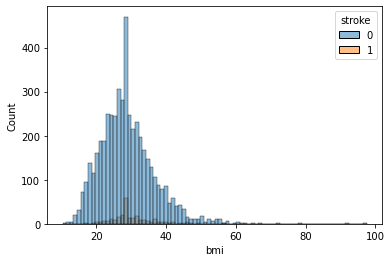

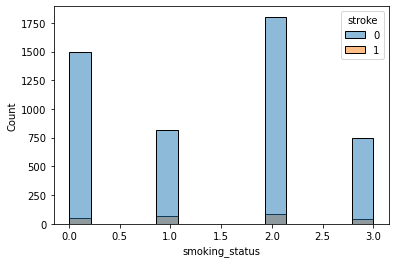

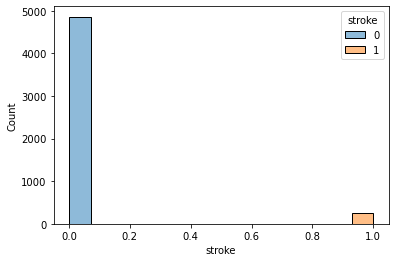

In [36]:
for i in num.columns:
    sns.histplot(data=num,hue='stroke',x=i)
    plt.show()

# Dataset spliting

In [37]:
X = num.drop(['stroke'], axis=1)
y = num['stroke']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [39]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4088, 10)
y_train: (4088,)
X_test: (1022, 10)
y_test: (1022,)


In [40]:
from sklearn.linear_model import Lasso

In [41]:
l1=Lasso(alpha=0.001)

In [42]:
l1.fit(X_train,y_train)

Lasso(alpha=0.001)

In [43]:
l1.predict(X_test)

array([ 0.1952547 , -0.01463052,  0.06736623, ...,  0.07707162,
        0.16620552,  0.01093787])

In [44]:
l1.score(X_train,y_train)

0.08272715223530969

# RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
Rfc = RandomForestClassifier(n_jobs=2, random_state=0)

In [47]:
Rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [48]:
y_pred = Rfc.predict(X_test)

In [49]:
acc_rf = round(Rfc.score(X_test,y_test) * 100, 2)

In [50]:
from sklearn import metrics #FOR ACCURACY CALCULATION

In [51]:
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 94.6183953033268 %


# KNeighborsClassifier

In [52]:
#TESTING USING KNEIGHBORS CLASSIFIERS
from sklearn.neighbors import KNeighborsClassifier
knC = KNeighborsClassifier(n_neighbors=3)

In [53]:
knC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knC.predict(X_test)
acc_knC = round(knC.score(X_test,y_test) * 100, 2)

In [55]:
from sklearn import metrics

In [56]:
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

kNN Accuracy: 94.03131115459882 %


# DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [58]:
Dtc =DecisionTreeClassifier(max_depth=10)

In [59]:
Dtc = Dtc.fit(X_train,y_train)

In [60]:
y_pred = Dtc.predict(X_test)
_dtc = round(Dtc.score(X_test,y_test) * 100, 2)

In [61]:
from sklearn.metrics import accuracy_score 

In [62]:
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")

Decision Tree Accuracy: 93.24853228962819 %


# The ML algorithm that perform the best was Random_Forest _Classifier with Accuracy: 94.6183953033268 %